In [2]:
!python -m spacy download en



    100% |████████████████████████████████| 52.2MB 48.3MB/s ta 0:00:01  3% |█▏                              | 1.9MB 7.5MB/s eta 0:00:07

    Linking successful

    /srv/app/venv/lib/python3.6/site-packages/en_core_web_sm/en_core_web_sm-1.2.0
    --> /srv/app/venv/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en').



# [SpaCy](https://spacy.io/): Industrial-Strength NLP

The tradtional NLP library has always been [NLTK](http://www.nltk.org/). While `NLTK` is still very useful for linguistics analysis and exporation, `spacy` has become a nice option for easy and fast implementation of the NLP pipeline. What's the NLP pipeline? It's a number of common steps computational linguists perform to help them (and the computer) better understand textual data. Digital Humanists are often fond of the pipeline because it gives us more things to count! Let's what `spacy` can give us that we can count.

In [3]:
from datascience import *
import spacy

Let's start out with a short string from our reading and see what happens.

In [4]:
my_string = '''
"What are you going to do with yourself this evening, Alfred?" said Mr.
Royal to his companion, as they issued from his counting-house in New
Orleans. "Perhaps I ought to apologize for not calling you Mr. King,
considering the shortness of our acquaintance; but your father and I
were like brothers in our youth, and you resemble him so much, I can
hardly realize that you are not he himself, and I still a young man.
It used to be a joke with us that we must be cousins, since he was a
King and I was of the Royal family. So excuse me if I say to you, as
I used to say to him. What are you going to do with yourself, Cousin
Alfred?"

"I thank you for the friendly familiarity," rejoined the young man.
"It is pleasant to know that I remind you so strongly of my good
father. My most earnest wish is to resemble him in character as much
as I am said to resemble him in person. I have formed no plans for the
evening. I was just about to ask you what there was best worth seeing
or hearing in the Crescent City."'''.replace("\n", " ")

We've downloaded the English model, and now we just have to load it. This model will do ***everything*** for us, but we'll only get a little taste today.

In [5]:
# nlp = spacy.load('en')
nlp = spacy.load('en', parser=False)  # run this instead if you don't have > 1GB RAM

To parse an entire text we just call the model on a string.

In [8]:
parsed_text = nlp(my_string)
parsed_text
# everything becomes an attribute of the product

 "What are you going to do with yourself this evening, Alfred?" said Mr. Royal to his companion, as they issued from his counting-house in New Orleans. "Perhaps I ought to apologize for not calling you Mr. King, considering the shortness of our acquaintance; but your father and I were like brothers in our youth, and you resemble him so much, I can hardly realize that you are not he himself, and I still a young man. It used to be a joke with us that we must be cousins, since he was a King and I was of the Royal family. So excuse me if I say to you, as I used to say to him. What are you going to do with yourself, Cousin Alfred?"  "I thank you for the friendly familiarity," rejoined the young man. "It is pleasant to know that I remind you so strongly of my good father. My most earnest wish is to resemble him in character as much as I am said to resemble him in person. I have formed no plans for the evening. I was just about to ask you what there was best worth seeing or hearing in the Cre

That was quick! So what happened? We've talked a lot about tokenizing, either in words or sentences.

What about sentences?

In [6]:
sents_tab = Table()
sents_tab.append_column(label="Sentence", values=[sentence for sentence in parsed_text.sents])
sents_tab.show()
# loop thru sentences/words within string, print properties of it
# num_rows ia an example of an attribute

Words?

In [7]:
toks_tab = Table()
toks_tab.append_column(label="Word", values=[word for word in parsed_text])
toks_tab.show()
# parsed text automatically splits the word
# words aren't unique

What about parts of speech?

In [8]:
toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
toks_tab.show()

Lemmata?

In [9]:
toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
toks_tab.show()
# lemma is root form of word, lemma of ran is run, slept is sleep
# form of deductionality reduction, we care about action of running not the tenses
# this is called lemmatizing

What else? Let's just make a function `tablefy` that will make a table of all this information for us:

In [53]:
def tablefy(parsed_text):
    toks_tab = Table()
    toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
    toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
    toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
    toks_tab.append_column(label="Stop Word", values=[word.is_stop for word in parsed_text])
    toks_tab.append_column(label="Punctuation", values=[word.is_punct for word in parsed_text])
    toks_tab.append_column(label="Space", values=[word.is_space for word in parsed_text])
    toks_tab.append_column(label="Number", values=[word.like_num for word in parsed_text])
    toks_tab.append_column(label="OOV", values=[word.is_oov for word in parsed_text])
    toks_tab.append_column(label="Dependency", values=[word.dep_ for word in parsed_text])
    return toks_tab

In [26]:
tablefy(parsed_text).show()

In [29]:
[type(word) for word in parsed_text]

[spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 

In [30]:
[type(word.text) for word in parsed_text]

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str

## Challenge

What's the most common verb? Noun? What if you only include lemmata? What if you remove "stop words"?

How would lemmatizing or removing "stop words" help us better understand a text over regular tokenizing?

In [33]:
tablefy(parsed_text).where('Stop Word', are.equal_to(False)).group('Lemma').sort("count", descending=True)
#lemmatization only affects verbs
#stop words ex. be, to, the, in, say, as -- very common words, so frequent they often take up the first 20 words in a count

Lemma    | count
,        | 10
.        | 9
"        | 8
resemble | 3
young    | 2
say      | 2
royal    | 2
mr.      | 2
man      | 2
king     | 2
... (51 rows omitted)

In [31]:
tablefy(parsed_text).where("POS", are.equal_to('VERB')).group('Word').sort('count', descending=True)

Word     | count
was      | 4
resemble | 3
are      | 3
used     | 2
say      | 2
said     | 2
is       | 2
going    | 2
do       | 2
be       | 2
... (20 rows omitted)

In [27]:
tablefy(parsed_text).where("POS", are.equal_to('NOUN')).group('Word').sort('count', descending=True)

Word      | count
man       | 2
father    | 2
evening   | 2
What      | 2
youth     | 1
wish      | 1
what      | 1
shortness | 1
plans     | 1
person    | 1
... (11 rows omitted)

---

## Dependency Parsing

Let's look at our text again:

In [34]:
parsed_text
# figure out what words depends on other words
# find relationships betw words
# works in tree form: root of tree, everything else that depends on it above

 "What are you going to do with yourself this evening, Alfred?" said Mr. Royal to his companion, as they issued from his counting-house in New Orleans. "Perhaps I ought to apologize for not calling you Mr. King, considering the shortness of our acquaintance; but your father and I were like brothers in our youth, and you resemble him so much, I can hardly realize that you are not he himself, and I still a young man. It used to be a joke with us that we must be cousins, since he was a King and I was of the Royal family. So excuse me if I say to you, as I used to say to him. What are you going to do with yourself, Cousin Alfred?"  "I thank you for the friendly familiarity," rejoined the young man. "It is pleasant to know that I remind you so strongly of my good father. My most earnest wish is to resemble him in character as much as I am said to resemble him in person. I have formed no plans for the evening. I was just about to ask you what there was best worth seeing or hearing in the Cre

Dependency parsing is one of the most useful and interesting NLP tools. A dependency parser will draw a tree of relationships between words. This is how you can find out specifically what adjectives are attributed to a specific person, what verbs are associated with a specific subject, etc.

`spacy` provides an online visualizer named "displaCy" to visualize dependencies. Let's look at the [first sentence](https://demos.explosion.ai/displacy/?text=%22What%20are%20you%20going%20to%20do%20with%20yourself%20this%20evening%2C%20Alfred%3F%22%20said%20Mr.%20Royal%20to%20his%20companion%2C%20as%20they%20issued%20from%20his%20counting-house%20in%20New%20Orleans.&model=en&cpu=1&cph=1)

![alt text](img/dep_parse.png)

We can loop through a dependency for a subject by checking the `head` attribute for the `pos` tag:

In [35]:
from spacy.symbols import nsubj, VERB

SV = []
for possible_subject in parsed_text:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        SV.append((possible_subject.text, possible_subject.head))

In [36]:
sv_tab = Table()
sv_tab.append_column(label="Subject", values=[x[0] for x in SV])
sv_tab.append_column(label="Verb", values=[x[1] for x in SV])
sv_tab.show()
#grab all the subject-verb dependencies
#relationship of subject, verbs
#use it to analyze perspectives, how is first person point of view used?
#prominent in text analysis

You can imagine that you could look over a large corpus to analyze first person, second person, and third person characterizations. Dependency parsers are also important for understanding and processing natural language, a question answering system for example. These models help the computer understand *what* the question is that is being asked.

## Limitations

How accurate are the models? What happens if we change the style of English we're working with?

In [ ]:
# models were used to analyze twitter, news articles, current event content
# limited by following texts

In [37]:
shakespeare = '''
Tush! Never tell me; I take it much unkindly
That thou, Iago, who hast had my purse
As if the strings were thine, shouldst know of this.
'''

shake_parsed = nlp(shakespeare.strip())
tablefy(shake_parsed).show()

In [38]:
huck_finn_jim = '''
“Who dah?” “Say, who is you?  Whar is you?  Dog my cats ef I didn’ hear sumf’n.
Well, I know what I’s gwyne to do:  I’s gwyne to set down here and listen tell I hears it agin.”"
'''

hf_parsed = nlp(huck_finn_jim.strip())
tablefy(hf_parsed).show()

In [39]:
text_speech = '''
LOL where r u rn? omg that's sooo funnnnnny. c u in a sec.
'''
ts_parsed = nlp(text_speech.strip())
tablefy(ts_parsed).show()

In [40]:
old_english = '''
þæt wearð underne      eorðbuendum, 
þæt meotod hæfde      miht and strengðo 
ða he gefestnade      foldan sceatas. 
'''
oe_parsed = nlp(old_english.strip())
tablefy(oe_parsed).show()

## NER and Civil War-Era Novels

Wilkens uses a technique called "NER", or "Named Entity Recognition" to let the computer identify all of the geographic place names. Wilkens writes:

> Text strings representing named locations in the corpus were identified using
the named entity recognizer of the Stanford CoreNLP package with supplied training
data. To reduce errors and to narrow the results for human review, only those
named-location strings that occurred at least five times in the corpus and were used
by at least two different authors were accepted. The remaining unique strings were
reviewed by hand against their context in each source volume. [883]

While we don't have the time for a human review right now, `spacy` does allow us to annotate place names (among other things!) in the same fashion as Stanford CoreNLP (a native Java library):

In [41]:
# named entity recognition
# call on string to detect entity- organizations, place, person
# fewer categories more probability for accuracy, but less specific
# detect entity in text, mark in specific entity categories

In [42]:
ner_tab = Table()
ner_tab.append_column(label="NER Label", values=[ent.label_ for ent in parsed_text.ents])
ner_tab.append_column(label="NER Text", values=[ent.text for ent in parsed_text.ents])
ner_tab.show()
#verbs won't be included b/c they're not an entity
#global/geographic place entity

Cool! It's identified a few types of things for us. We can check what these mean [here](https://spacy.io/docs/usage/entity-recognition#entity-types). `GPE` is country, cities, or states. Seems like that's what Wilkens was using.

Since we don't have his corpus of 1000 novels, let's just take our reading, *A Romance of the Republic*, as an example. We can use the `requests` library to get the raw `HTML` of a web page, and if we take the `.text` property we can make this a nice string.

In [17]:
import requests

text = requests.get("http://www.gutenberg.org/files/10549/10549.txt").text
text = text[1050:].replace('\r\n', ' ')  # fix formatting and skip title header
print(text[:5000])

 CHAPTER I.   "What are you going to do with yourself this evening, Alfred?" said Mr. Royal to his companion, as they issued from his counting-house in New Orleans. "Perhaps I ought to apologize for not calling you Mr. King, considering the shortness of our acquaintance; but your father and I were like brothers in our youth, and you resemble him so much, I can hardly realize that you are not he himself, and I still a young man. It used to be a joke with us that we must be cousins, since he was a King and I was of the Royal family. So excuse me if I say to you, as I used to say to him. What are you going to do with yourself, Cousin Alfred?"  "I thank you for the friendly familiarity," rejoined the young man. "It is pleasant to know that I remind you so strongly of my good father. My most earnest wish is to resemble him in character as much as I am said to resemble him in person. I have formed no plans for the evening. I was just about to ask you what there was best worth seeing or heari

We'll leave the chapter headers for now, it shouldn't affect much. Now we need to parse this with that `nlp` function:

In [18]:
parsed = nlp(text)
# tagged all parts of speech, entities, lemmatized entire text

## Challenge

With this larger string, find the most common noun, verb, and adjective. Then explore the other features of `spacy` and see what you can discover about our reading:

In [ ]:
#skip this challenge
#find most common words similar to 2 paragraph text above

---

Let's continue in the fashion that Wilkens did and extract the named entities, specifically those for "GPE". We can loop through each entity, and if it is labeled as `GPE` we'll add it to our `places` list. We'll then make a `Counter` object out of that to get the frequency of each place name.

In [19]:
from collections import Counter

places = []

for ent in parsed.ents:
    if ent.label_ == "GPE":
        places.append(ent.text.strip())

places = Counter(places)
places.most_common()

# places itself may return some errors, labels Beethoven as 1

[('Tulee', 64),
 ('New Orleans', 63),
 ('Boston', 58),
 ('Nassau', 25),
 ('Savannah', 21),
 ('Rome', 20),
 ('France', 19),
 ('Eulalia', 19),
 ('New York', 19),
 ('the United States', 16),
 ('South', 13),
 ('Italy', 12),
 ('Paris', 11),
 ('Thistle', 11),
 ('Signor', 9),
 ('Papasito', 8),
 ('Magnolia Lawn', 8),
 ('Tulipa', 7),
 ('England', 7),
 ('Massachusetts', 7),
 ('Carolina', 7),
 ('Floracita', 6),
 ('Georgia', 6),
 ('Washington', 6),
 ('Northampton', 6),
 ('Henriet', 6),
 ('Louisiana', 4),
 ('_', 4),
 ('Java', 4),
 ('America', 4),
 ('New Rochelle', 4),
 ('Mozart', 3),
 ('Rosabella', 3),
 ('Providence', 3),
 ('Marseilles', 3),
 ('Damascus', 3),
 ('Natchez', 3),
 ('Oriental', 2),
 ('Rosamunda', 2),
 ('Moorish', 2),
 ('Thou', 2),
 ('Savannah to', 2),
 ('Arkansas', 2),
 ('Paradise', 2),
 ('Magnolia', 2),
 ('Virginia', 2),
 ('the Free States', 2),
 ('the Southern States', 2),
 ('Florence', 2),
 ('Frascati', 2),
 ('Puritan', 2),
 ('Florimond', 2),
 ('Whittier', 2),
 ('New Bedford', 2),
 (

That looks OK, but it's pretty rough! Keep this in mind when using trained models. They aren't 100% accurate. That's why Wilkens went through by hand after to get rid of the garbage.

If you thought NER was cool, wait for this. Now that we have a list of "places", we can send that to an online database to get back latitude and longitude coordinates (much like Wilkens used Google's geocoder), along with the US state. To make sure it's actually a US state, we'll need a list to compare to. So let's load that:

In [47]:
with open('data/us_states.txt', 'r') as f:
    states = f.read().split('\n')
    states = [x.strip() for x in states]

states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

OK, now we're ready. The `Nominatim` function from the `geopy` library will return an object that has the properties we want. We'll append a new row to our table for each entry. Importantly, we're using the `keys` of the `places` counter because we don't need to ask the database for "New Orleans" 10 times to get the location. So after we get the information we'll just add as many rows as the counter tells us there are.

In [48]:
from geopy.geocoders import Nominatim
from datascience import *
import time

geolocator = Nominatim(timeout=10)

geo_tab = Table(["latitude", "longitude", "name", "state"])

for name in places.keys():  # only want to loop through unique place names to call once per place name
    print("Getting information for " + name + "...")
    
    # finds the lat and lon of each name in the locations list
    location = geolocator.geocode(name)

    try:
        # index the raw response for lat and lon
        lat = float(location.raw["lat"])
        lon = float(location.raw["lon"])
        
        # string manipulation to find state name
        for p in location.address.split(","):
            if p.strip() in states:
                state = p.strip()
                break

        # add to our table
        for i in range(places[name] - 1):
            geo_tab.append(Table.from_records([{"name": name,
                                          "latitude": lat,
                                          "longitude": lon,
                                          "state": state}]).row(0))
    except:
        pass

Getting information for New Orleans...
Getting information for Crescent City...
Getting information for Boston...
Getting information for France...
Getting information for Papasito...
Getting information for Floracita...
Getting information for Taglioni...
Getting information for Italy...
Getting information for Mozart...
Getting information for Buona Notte...
Getting information for West Indies...
Getting information for Tulipa...
Getting information for Oriental...
Getting information for St. Augustine...
Getting information for Paris...
Getting information for Eulalia...
Getting information for Louisiana...
Getting information for Canova...
Getting information for La Bayadere...
Getting information for Venice...
Getting information for Battledoor...
Getting information for Cher...
Getting information for _...
Getting information for Buenas...
Getting information for Rosabella...
Getting information for Youth...
Getting information for New York...
Getting information for Mamita...
Ge

In [49]:
geo_tab.show()

Now we can plot a nice [choropleth](https://en.wikipedia.org/wiki/Choropleth_map).

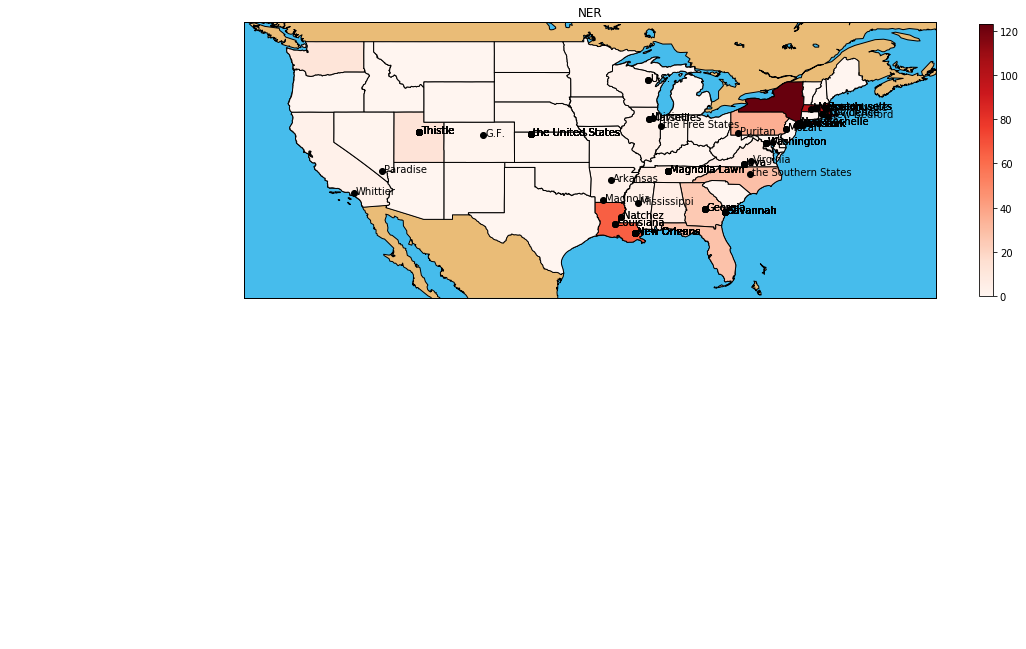

In [50]:
%matplotlib inline

from scripts.choropleth import us_choropleth
us_choropleth(geo_tab)

#Lesson: works to some extent, ex. Thistle, PA. Taking most important ones from this map can identify most prevalent in text. Scale does sacrifice accuracy. Most common thing can be pinpointed from these semi-accurate models, with enough data. 

---

# Homework:

Find the text to three different Civil War-Era (1851-1875) novels on [Project Gutenberg](https://www.gutenberg.org/) (maybe mentioned in our reading?!). Make sure you click for the `.txt` files, and use a `GET` request from the `requests` library to get the text. 

First do some exploration on parts of speech. Then combine the NER location frequencies and plot a choropleth. Look closely at the words plotted. How did the NER model do? How does your choropleth look compared to Wilkens'?

In [7]:
# Pierre; or The Ambiguities, by Herman Melville
import requests

pierre_text = requests.get("http://www.gutenberg.org/cache/epub/34970/pg34970.txt").text
# text = text[1050:].replace('\r\n', ' ')  # fix formatting and skip title header
pierre_str = str(pierre_text)

pierre_parsed = nlp(pierre_str)
# # pierre_parsed = nlp(str(print(text)))
pierre_parsed

pierre_tokens_table = Table()
pierre_tokens_table.append_column(label="Word", values=[word for word in pierre_parsed[:1000]])
pierre_tokens_table.show()


In [8]:
pierre_tokens_table.append_column(label="POS", values=[word.pos_ for word in pierre_parsed[:1000]])
pierre_tokens_table.show()

In [18]:
len(pierre_parsed)

204194

In [9]:
# Moby Dick; or The Whale, by Herman Melville

md_text = requests.get("https://www.gutenberg.org/files/2701/2701-0.txt").text
# moby_dick_text = print(text)
md_str = str(md_text)

md_parsed = nlp(md_str)

md_tokens_table = Table()
md_tokens_table.append_column(label="Word", values=[word for word in md_parsed[:1000]])
md_tokens_table.show()

In [10]:
md_tokens_table.append_column(label="POS", values=[word.pos_ for word in md_parsed[:1000]])
md_tokens_table.show()

In [11]:
# The Marble Faun, Volume I., by Nathaniel Hawthorne

mf_text = requests.get("https://www.gutenberg.org/files/2181/2181-0.txt").text
mf_str = str(mf_text)

mf_parsed = nlp(mf_str)

mf_tokens_table = Table()
mf_tokens_table.append_column(label="Word", values=[word for word in mf_parsed[:1000]])
mf_tokens_table.show()

In [12]:
mf_tokens_table.append_column(label="POS", values=[word.pos_ for word in mf_parsed[:1000]])
mf_tokens_table.show()

In [13]:
combined = pierre_str + md_str + mf_str
combined

'\ufeffThe Project Gutenberg EBook of Pierre; or The Ambiguities, by Herman Melville\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Pierre; or The Ambiguities\r\n\r\nAuthor: Herman Melville\r\n\r\nRelease Date: January 15, 2011 [EBook #34970]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK PIERRE; OR THE AMBIGUITIES ***\r\n\r\n\r\n\r\n\r\nProduced by Chuck Greif and the Online Distributed\r\nProofreading Team at http://www.pgdp.net (This book was\r\nproduced from scanned images of public domain material\r\nfrom the Google Print project.)\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nPIERRE:\r\nOR,\r\nTHE AMBIGUITIES.\r\n\r\nBY\r\nHERMAN MELVILLE.\r\n\r\nNEW YORK:\r\nHARPER & BROTHERS, PUBLISHERS\r\n329 & 331 PEARL STREET,\r\nFRANKLIN S

In [14]:
combined_parsed = nlp(combined)

In [20]:
from collections import Counter

combined_places = []

for ent in combined_parsed.ents:
    if ent.label_ == "GPE":
        combined_places.append(ent.text.strip())

combined_places = Counter(combined_places)
combined_places.most_common()

[('', 491),
 ('Ahab', 424),
 ('Queequeg', 96),
 ('Rome', 88),
 ('Thou', 53),
 ('Leviathan', 50),
 ('Captain', 42),
 ('Flask', 34),
 ('Stubb', 33),
 ('Greenland', 29),
 ('Saddle Meadows', 28),
 ('heaven', 25),
 ('Tashtego', 25),
 ('the United States', 23),
 ('China', 22),
 ('England', 21),
 ('the', 21),
 ('Bildad', 21),
 ('Donatello', 21),
 ('Italy', 17),
 ('Perth', 17),
 ('Greenwich', 15),
 ('America', 14),
 ('France', 13),
 ('London', 13),
 ('Pequod', 13),
 ('Cape', 12),
 ('Truth', 11),
 ('New Bedford', 11),
 ('Egypt', 10),
 ('Japan', 10),
 ('Peleg', 10),
 ('Steelkilt', 10),
 ('Daggoo', 9),
 ('Virginia', 8),
 ('U.S.', 8),
 ('Lima', 8),
 ('Guernsey', 8),
 ('Delly', 7),
 ('Isabel', 7),
 ('Jerusalem', 7),
 ('Plato', 7),
 ('Ishmael', 7),
 ('Aye', 7),
 ('Octavo', 7),
 ('Lakeman', 7),
 ('Trevi', 7),
 ('Paradise', 6),
 ('Java', 6),
 ('India', 6),
 ('Titan', 6),
 ('Sumatra', 6),
 ('Jonah', 6),
 ('Bulkington', 6),
 ('Folio', 6),
 ('him', 5),
 ('Pierre', 5),
 ('Nineveh', 5),
 ('thou', 5),
 ('Sa

In [21]:
with open('data/us_states.txt', 'r') as f:
    states = f.read().split('\n')
    states = [x.strip() for x in states]

states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [24]:
from geopy.geocoders import Nominatim
from datascience import *
import time

geolocator = Nominatim(timeout=10)

geo_tab = Table(["latitude", "longitude", "name", "state"])

for name in combined_places.keys():  # only want to loop through unique place names to call once per place name
    print("Getting information for " + name + "...")
    
    # finds the lat and lon of each name in the locations list
    location = geolocator.geocode(name)

    try:
        # index the raw response for lat and lon
        lat = float(location.raw["lat"])
        lon = float(location.raw["lon"])
        
        # string manipulation to find state name
        for p in location.address.split(","):
            if p.strip() in states:
                state = p.strip()
                break

        # add to our table
        for i in range(combined_places[name] - 1):
            geo_tab.append(Table.from_records([{"name": name,
                                          "latitude": lat,
                                          "longitude": lon,
                                          "state": state}]).row(0))
    except:
        pass

Getting information for ...
Getting information for Majesty...
Getting information for Berkshire...
Getting information for Pittsfield...
Getting information for Mass....
Getting information for THE CITY...
Getting information for Nature...
Getting information for Pierre's...
Getting information for America...
Getting information for France...
Getting information for England...
Getting information for Richmond...
Getting information for Grafton...
Getting information for Portland...
Getting information for Buccleugh...
Getting information for Virginia...
Getting information for Unimaginable...
Getting information for Gospels...
Getting information for the...
Getting information for Queen...
Getting information for Paradise...
Getting information for Romeo...
Getting information for Juggernaut...
Getting information for Saddle-Meadows...
Getting information for Genoa...
Getting information for Arabia...
Getting information for Kentucky...
Getting information for Hindostan...
Getting inf

Getting information for Prairies...
Getting information for Tennessee...
Getting information for Rockaway Beach...
Getting information for Captain...
Getting information for Providence...
Getting information for New Bedford...
Getting information for December...
Getting information for Carthage...
Getting information for Ishmael...
Getting information for Gomorrah...
Getting information for Tophet...
Getting information for Wretched...
Getting information for Sumatra...
Getting information for Javan...
Getting information for Cape...
Getting information for Labrador...
Getting information for Jonah...
Getting information for Bulkington...
Getting information for Sartain...
Getting information for New Zealand...
Getting information for Sabbath...
Getting information for Zealand...
Getting information for Congo...
Getting information for Queequeg...
Getting information for Cretan...
Getting information for bed...
Getting information for Newfoundland...
Getting information for Grub...
Get

Getting information for Darien...
Getting information for Lais...
Getting information for Quoin...
Getting information for Heidelburgh...
Getting information for Sphinx...
Getting information for Unhinge...
Getting information for Bremen...
Getting information for Yarman...
Getting information for Andromeda...
Getting information for Perseus...
Getting information for St. George...
Getting information for Coffin...
Getting information for Perseus’...
Getting information for Israel...
Getting information for Vishnoo...
Getting information for Tigris...
Getting information for Actium...
Getting information for Pyrrho...
Getting information for Birmah...
Getting information for Sunda...
Getting information for Malays...
Getting information for Pacific...
Getting information for Gulfweed...
Getting information for Lothario...
Getting information for Meddling...
Getting information for Littleton...
Getting information for Ireland...
Getting information for Greece...
Getting information for 

In [25]:
geo_tab.show()

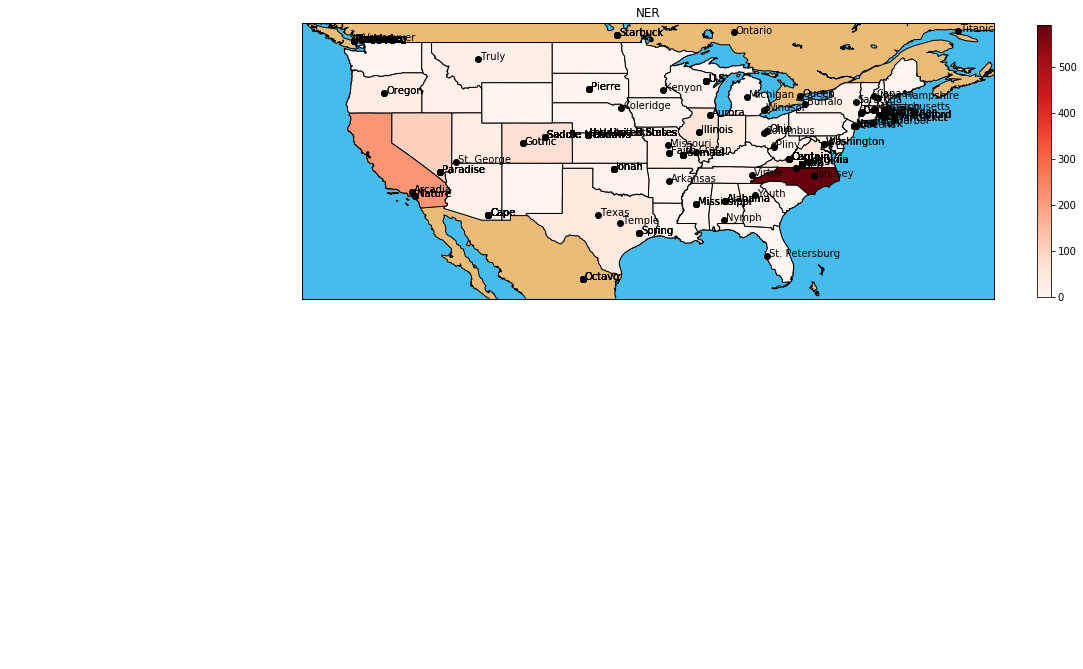

In [26]:
%matplotlib inline

from scripts.choropleth import us_choropleth
us_choropleth(geo_tab)

In [27]:
# The NER model in this case does not seem very accurate, especially after identifying words like "Merry Christmas", "Inferno", and "Autumn" as places. Compared to Wilkens' choropleth, this choropleth appears even less accurate. It may be that the text includes a wider variety of locations and diversity of words in general. The wide range of locations, perhaps more spread out across the world, is inaccurately noted in the choropleth. For instance, St. Petersburg is plotted in Florida. At the same time, there are accurate depictions as seen with many American states like Oregon, Texas, and Arkansas. In addition, there seems to be more clutter in the choropleth as a whole and more overlapping points in the New England area of the States. 